# <font color='CC3D3D'> User Spec Clusters Analysis
    
### 1. Cluster별 특징 파악
    - 신용점수
    - 연소득
    - 희망대출금액
    - 연령
    - 기대출액
    
### 2. Cluster별 Event 분석
    - LoanApply 중 이탈률 분석
    - GetCreditInfo 사용 횟수 분석

# Import

In [27]:
import re

In [28]:
from collections import Counter

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [31]:
train = pd.read_csv('../Data/master_train_data_cluster.csv')
public = pd.read_csv('../Data/master_public_data_cluster.csv')
test = pd.read_csv('../Data/master_test_data_cluster.csv')
private = pd.read_csv('../Data/master_private_data_cluster.csv')

In [32]:
df = pd.concat([train,public,test,private])
df = df[['user_id','credit_score','yearly_income','desired_amount',
         'existing_loan_cnt','existing_loan_amt','enter_birth','age']]

In [33]:
user_df = df.groupby(['user_id']).mean()
user_df

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,enter_birth,age
user_id,,,,,,,
9.0,810.000000,2.900000e+07,1.500000e+07,1.00,17800000.0,26.0,27.0
11.0,664.186047,2.683721e+07,2.176744e+07,1.00,14000000.0,24.0,26.0
14.0,608.000000,2.700000e+07,3.000000e+07,4.40,67200000.0,55.0,58.0
17.0,540.000000,5.000000e+07,7.200000e+06,6.52,47400000.0,28.0,30.0
19.0,848.000000,0.000000e+00,2.000000e+07,7.00,34000000.0,34.0,36.0
...,...,...,...,...,...,...,...
879692.0,790.000000,4.400000e+07,2.540000e+07,3.00,21000000.0,29.0,31.0
879693.0,681.200000,2.400000e+07,3.240000e+06,3.00,16000000.0,20.0,22.0
879695.0,672.000000,3.000000e+07,1.500000e+07,1.60,39000000.0,26.0,27.0


In [34]:
user_cluster = pd.read_csv('../Data/user_spec_cluster.csv')
user_cluster = user_cluster.set_index('user_id')
user_cluster

,cluster
user_id,
9.0,2
11.0,2
14.0,1
17.0,2
19.0,0
...,...
879692.0,2
879693.0,2
879695.0,2


In [35]:
user_df = pd.merge(user_df,user_cluster,'left','user_id')

In [36]:
user_df

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,enter_birth,age,cluster
user_id,,,,,,,,
9.0,810.000000,2.900000e+07,1.500000e+07,1.00,17800000.0,26.0,27.0,2
11.0,664.186047,2.683721e+07,2.176744e+07,1.00,14000000.0,24.0,26.0,2
14.0,608.000000,2.700000e+07,3.000000e+07,4.40,67200000.0,55.0,58.0,1
17.0,540.000000,5.000000e+07,7.200000e+06,6.52,47400000.0,28.0,30.0,2
19.0,848.000000,0.000000e+00,2.000000e+07,7.00,34000000.0,34.0,36.0,0
...,...,...,...,...,...,...,...,...
879692.0,790.000000,4.400000e+07,2.540000e+07,3.00,21000000.0,29.0,31.0,2
879693.0,681.200000,2.400000e+07,3.240000e+06,3.00,16000000.0,20.0,22.0,2
879695.0,672.000000,3.000000e+07,1.500000e+07,1.60,39000000.0,26.0,27.0,2


# Cluster별 특징 파악
    - 신용점수
    - 연소득
    - 희망대출금액
    - 연령
    - 기대출액

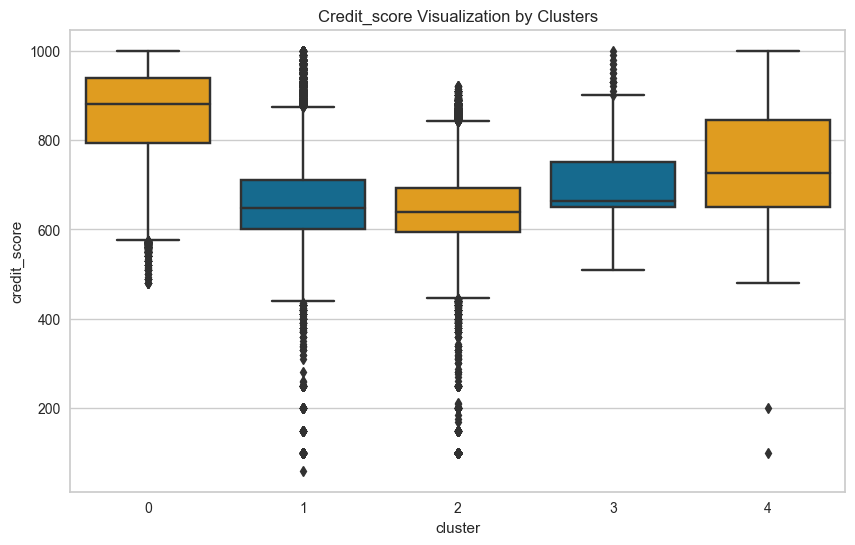

In [56]:

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x="cluster", y="credit_score",
            palette=["orange", "b"],
            data=user_df)

ax.set_title('Credit_score Visualization by Clusters')
plt.show()

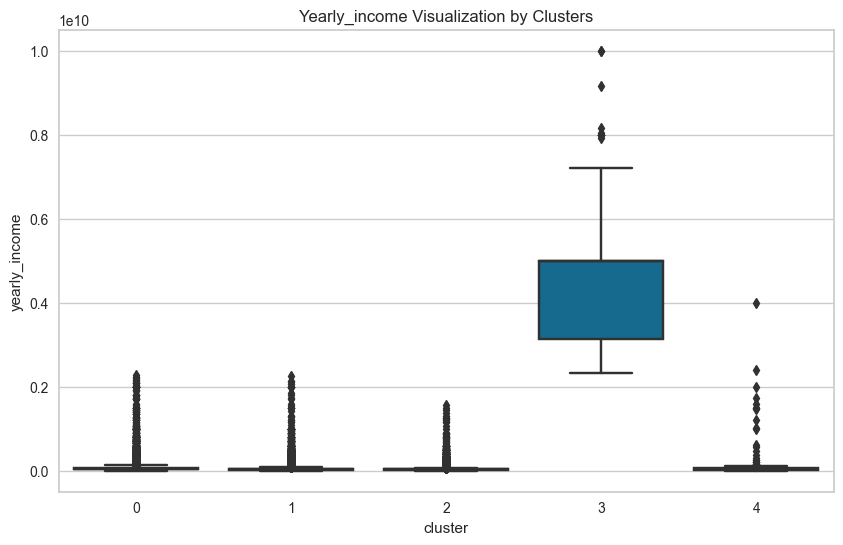

In [54]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x="cluster", y="yearly_income",
            palette=["orange", "b"],
            data=user_df)

ax.set_title('Yearly_income Visualization by Clusters')
plt.show()

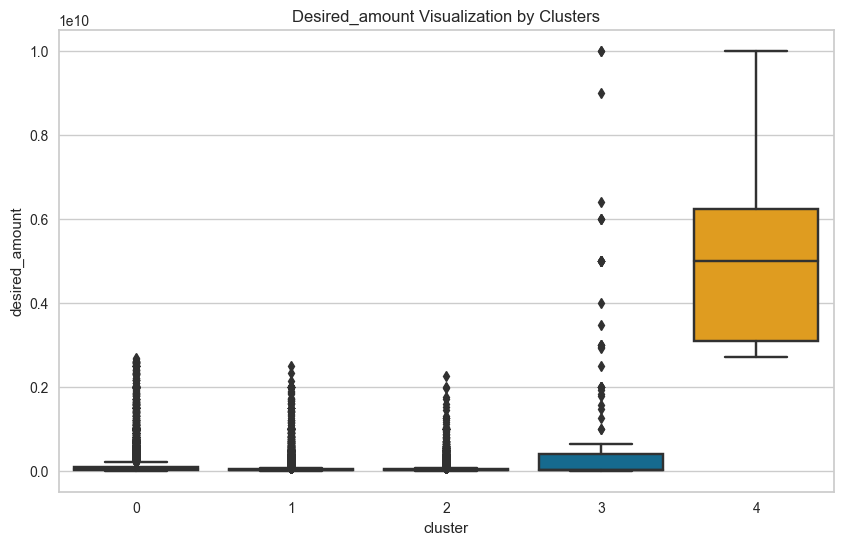

In [52]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x="cluster", y="desired_amount",
            palette=["orange", "b"],
            data=user_df)

ax.set_title('Desired_amount Visualization by Clusters')
plt.show()desired_amount

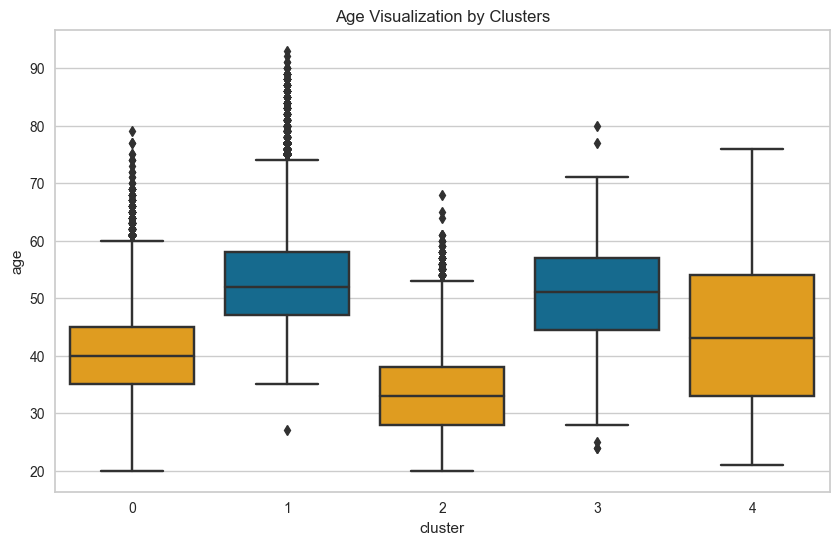

In [50]:
sns.set_palette('deep')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x="cluster", y="age",
            palette=["orange", "b"],
            data=user_df)

ax.set_title('Age Visualization by Clusters')
plt.show()

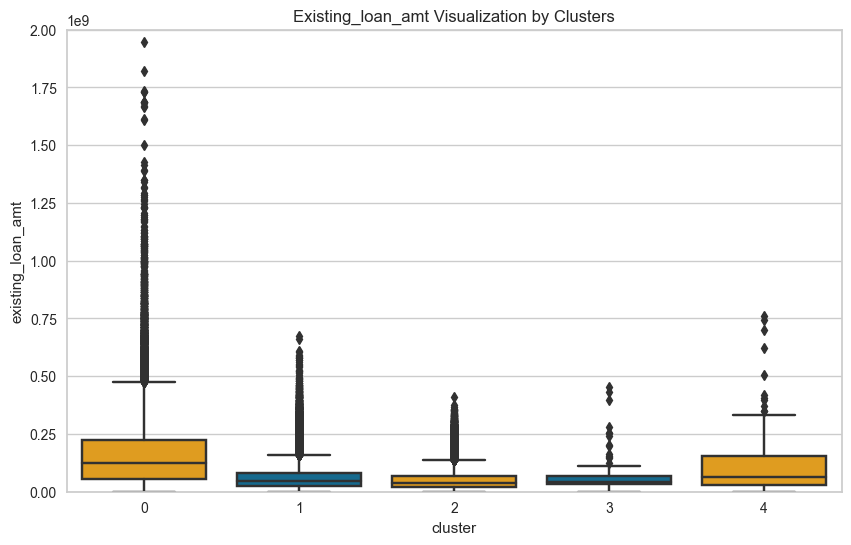

In [49]:
sns.set_palette('deep')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x="cluster", y="existing_loan_amt",
            palette=["orange", "b"],
            data=user_df)

ax.set_title('Existing_loan_amt Visualization by Clusters')
ax.set_ylim(0,2e9)
plt.show()

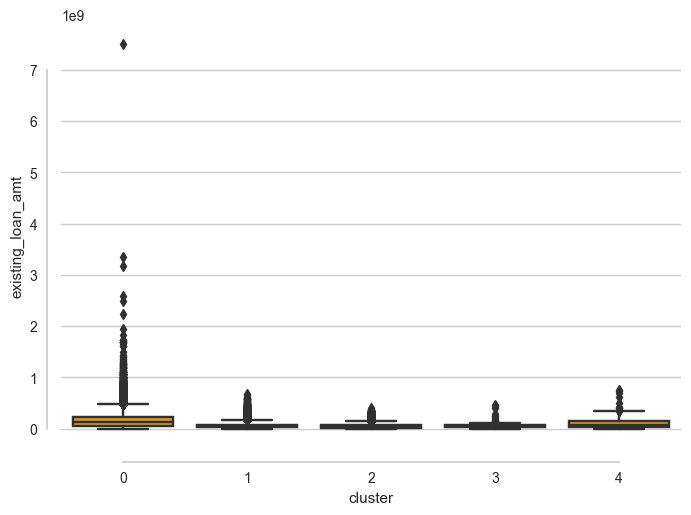

In [42]:
sns.boxplot(x="cluster", y="existing_loan_amt",
            palette=["orange", "b"],
            data=user_df)

sns.despine(offset=10, trim=True)

In [41]:
user_df['cluster'].value_counts()

2    153816
1     99144
0     64048
4       296
3       163
Name: cluster, dtype: int64

# Cluster별 Event 분석

In [10]:
events = pd.read_csv('../Data/main_events.csv')
events = events.set_index('user_id')
events

,events
user_id,
1,"['GetCreditInfo', 'GetCreditInfo']"
7,['GetCreditInfo']
9,['GetCreditInfo']
11,"['GetCreditInfo', 'UsePrepayCalc', 'StartLoanA..."
12,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
...,...
879693,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
879694,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
879695,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."


In [11]:
user_df = pd.merge(user_df,events,'inner','user_id')

In [12]:
user_df

,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,enter_birth,age,cluster,events
user_id,,,,,,,,,
9.0,810.000000,2.900000e+07,1.500000e+07,1.00,17800000.0,26.0,27.0,2,['GetCreditInfo']
11.0,664.186047,2.683721e+07,2.176744e+07,1.00,14000000.0,24.0,26.0,2,"['GetCreditInfo', 'UsePrepayCalc', 'StartLoanA..."
14.0,608.000000,2.700000e+07,3.000000e+07,4.40,67200000.0,55.0,58.0,1,['GetCreditInfo']
17.0,540.000000,5.000000e+07,7.200000e+06,6.52,47400000.0,28.0,30.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
19.0,848.000000,0.000000e+00,2.000000e+07,7.00,34000000.0,34.0,36.0,0,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
...,...,...,...,...,...,...,...,...,...
879691.0,620.000000,3.100000e+07,3.500000e+07,4.00,49000000.0,30.0,32.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'GetC..."
879692.0,790.000000,4.400000e+07,2.540000e+07,3.00,21000000.0,29.0,31.0,2,"['GetCreditInfo', 'StartLoanApply', 'ViewLoanA..."
879693.0,681.200000,2.400000e+07,3.240000e+06,3.00,16000000.0,20.0,22.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."


In [13]:
user_df = user_df.reset_index()
user_df

,user_id,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,enter_birth,age,cluster,events
0,9.0,810.000000,2.900000e+07,1.500000e+07,1.00,17800000.0,26.0,27.0,2,['GetCreditInfo']
1,11.0,664.186047,2.683721e+07,2.176744e+07,1.00,14000000.0,24.0,26.0,2,"['GetCreditInfo', 'UsePrepayCalc', 'StartLoanA..."
2,14.0,608.000000,2.700000e+07,3.000000e+07,4.40,67200000.0,55.0,58.0,1,['GetCreditInfo']
3,17.0,540.000000,5.000000e+07,7.200000e+06,6.52,47400000.0,28.0,30.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
4,19.0,848.000000,0.000000e+00,2.000000e+07,7.00,34000000.0,34.0,36.0,0,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
...,...,...,...,...,...,...,...,...,...,...
293511,879691.0,620.000000,3.100000e+07,3.500000e+07,4.00,49000000.0,30.0,32.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'GetC..."
293512,879692.0,790.000000,4.400000e+07,2.540000e+07,3.00,21000000.0,29.0,31.0,2,"['GetCreditInfo', 'StartLoanApply', 'ViewLoanA..."
293513,879693.0,681.200000,2.400000e+07,3.240000e+06,3.00,16000000.0,20.0,22.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."
293514,879695.0,672.000000,3.000000e+07,1.500000e+07,1.60,39000000.0,26.0,27.0,2,"['StartLoanApply', 'ViewLoanApplyIntro', 'EndL..."


In [14]:
user_df['events'] = user_df['events'].apply(lambda x:re.sub(r"[^a-zA-Z]", " ", x))
user_df['events'] = user_df['events'].apply(lambda x: x.strip())
user_df['events'] = user_df['events'].apply(lambda x: x.split())

In [15]:
Counter(user_df['events'][1])

Counter({'GetCreditInfo': 2,
         'UsePrepayCalc': 1,
         'StartLoanApply': 4,
         'ViewLoanApplyIntro': 4,
         'EndLoanApply': 4})

In [16]:
user_df['GetCreditInfo'] = 0
user_df['UsePrepayCalc'] = 0
user_df['StartLoanApply'] = 0
user_df['ViewLoanApplyIntro'] = 0
user_df['EndLoanApply'] = 0

In [17]:
user_df['events_count'] = user_df['events'].apply(lambda x: Counter(x))
user_df['events_count']

0                                      {'GetCreditInfo': 1}
1         {'GetCreditInfo': 2, 'UsePrepayCalc': 1, 'Star...
2                                      {'GetCreditInfo': 1}
3         {'StartLoanApply': 2, 'ViewLoanApplyIntro': 2,...
4         {'StartLoanApply': 1, 'ViewLoanApplyIntro': 1,...
                                ...                        
293511    {'StartLoanApply': 5, 'ViewLoanApplyIntro': 5,...
293512    {'GetCreditInfo': 4, 'StartLoanApply': 4, 'Vie...
293513    {'StartLoanApply': 5, 'ViewLoanApplyIntro': 5,...
293514    {'StartLoanApply': 1, 'ViewLoanApplyIntro': 1,...
293515    {'GetCreditInfo': 1, 'ViewLoanApplyIntro': 1, ...
Name: events_count, Length: 293516, dtype: object

In [18]:
from tqdm import tqdm

In [19]:
for i in tqdm(range(len(user_df))):
    events_count = user_df.loc[i,'events_count']
    user_df.loc[i,'GetCreditInfo'] = events_count['GetCreditInfo']
    user_df.loc[i,'UsePrepayCalc'] = events_count['UsePrepayCalc']
    user_df.loc[i,'StartLoanApply'] = events_count['StartLoanApply']
    user_df.loc[i,'ViewLoanApplyIntro'] = events_count['ViewLoanApplyIntro']
    user_df.loc[i,'EndLoanApply'] = events_count['EndLoanApply']

100%|████████████████████████████████████████████████████████████████████████| 293516/293516 [01:28<00:00, 3322.70it/s]


In [20]:
user_df.columns

Index(['user_id', 'credit_score', 'yearly_income', 'desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'enter_birth', 'age',
       'cluster', 'events', 'GetCreditInfo', 'UsePrepayCalc', 'StartLoanApply',
       'ViewLoanApplyIntro', 'EndLoanApply', 'events_count'],
      dtype='object')

In [21]:
user_df['Seperate StartLoanApply and EndLoanApply'] = 0

In [22]:
user_df['Seperate StartLoanApply and EndLoanApply'] = 0
start_df = user_df[['StartLoanApply','cluster','Seperate StartLoanApply and EndLoanApply']]
end_df = user_df[['EndLoanApply','cluster','Seperate StartLoanApply and EndLoanApply']]
end_df.columns = ['StartLoanApply','cluster','Seperate StartLoanApply and EndLoanApply']
end_df['Seperate StartLoanApply and EndLoanApply'] = 1

C:\Users\hyj\AppData\Local\Temp\ipykernel_3112\3798481843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_df['Seperate StartLoanApply and EndLoanApply'] = 1


In [23]:
tmp_df = pd.concat([start_df,end_df],axis=0)
tmp_df.columns = ['LoanApply_cnt','cluster','Seperate StartLoanApply and EndLoanApply']

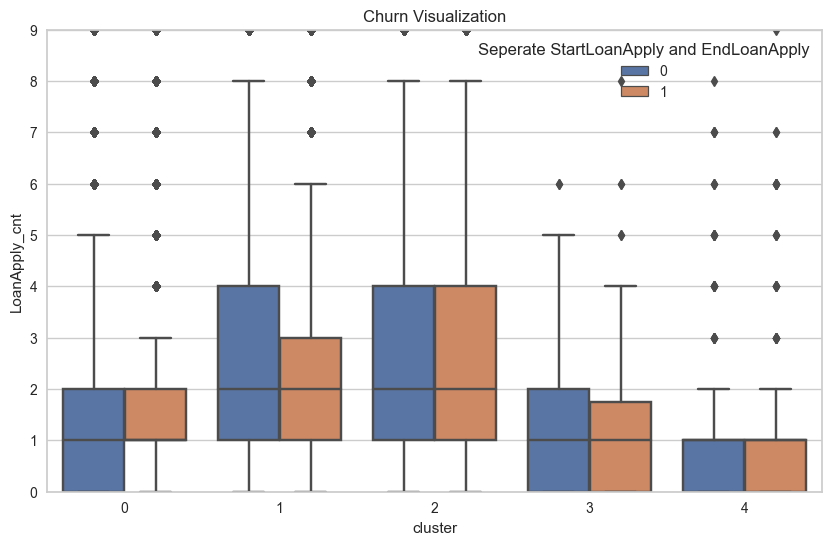

In [24]:
sns.set_palette('deep')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

ax = sns.boxplot(x="cluster", y="LoanApply_cnt",
                 hue = 'Seperate StartLoanApply and EndLoanApply',
                 data=tmp_df)
ax.set_title('Churn Visualization')
ax.set_ylim(0,9)
plt.show()

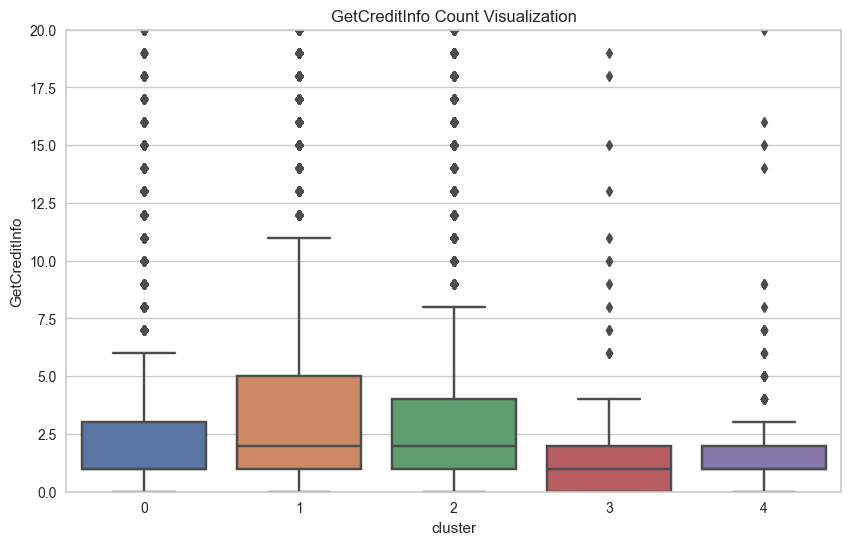

In [26]:
sns.set_palette('deep')

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

ax = sns.boxplot(x="cluster", y="GetCreditInfo",
                 data=user_df)
ax.set_ylim(0,20)
ax.set_title('GetCreditInfo Count Visualization')
plt.show()